# Analyze Supermarket Data Across the Country - Company XYZ

Company XYZ owns a supermarket chain across the country. Each major branch located in 3 cities across the country recorded sales information for 3 months, to help the company understand sales trends and determine its growth, as the rise of supermarkets competition is seen.

You will apply learnings to analyse the dataset in the data folder, and the description of each feature can be found in this [link](https://docs.google.com/document/d/1Sv-DlynHpOBAs5qKokn5MtbzqZcumTSlSI4-wQ0kf0w/edit?usp=sharing)

## Step 1 - Loading the Dataset
In this step, you will combine the dataset from each branch (3 branches) into one dataset for easy analysis. You expected to write the syntaxes that will read multiple files from your current working directory and export a CSV file after combining. 
The learning from this step is the ability to automate reading and combining multiple CSV files, because as a Data Professional, you will saddled with the responsibility of reading data from different sources, and this is one of the use case.

#### To-Do - Import Libraries

In [1]:
import os
import glob
import pandas as pd
os.chdir(r"C:\Users\gurej\Documents\GitHub\Data-Analysis-Project") #Current working directory that contains your dataset and code file

#### To-Do - Use glob to match the pattern "csv"

In [2]:
extension = 'csv'
#Using glob to match pattern "csv" and saving it to result
result = [i for i in glob.glob('*.{}'.format(extension))]
result

['Abuja_Branch.csv', 'Lagos_Branch.csv', 'Port_Harcourt_Branch.csv']

#### To-Do - Combine all the files in the generated list above and export to a CSV
Tips - Use the `pd.concat` method

In [3]:
#combine all files in the list
combined = pd.concat([pd.read_csv(f) for f in result ])

#Export to csv
combined.to_csv( "combined.csv", index=False, encoding='utf-8-sig')


#### To-Do -Read the CSV file using `pd.read_csv` method

In [4]:
#Reading the csv file
combined_df = pd.read_csv("combined.csv")

## Step 2 - Data Exploration
In this step you will explore the loaded dataset using some built-in Pandas function. You expected to begin to think about your analytical approach from here. 
You can include other methods that you might think will make your exploration process easier. For Instance, you can write a function that print out a summary of the missing data occurence in the data. Be sure to document these methods using `markdown` and in-line `comments`.

### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

#### To-Do - Use the head() method to view first few rows of the dataset

In [6]:
#Using the head() method
combined_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


#### To-Do - Check the number of rows and columns present in the data using the shape attribute.

In [7]:
#Using the shape attribute
combined_df.shape

(1000, 17)

#### To-Do - Generate the names of the columns using the columns attribute.

In [8]:
#Using the columns attribute
combined_df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#### To-Do - Statiscal Summary
The describe method provides the data statistical summary for the dataset, use the method to explore the statistical summary.

In [9]:
#Using the describe method
combined_df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,0.000000,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905,17874.000000,10.00000


#### To-Do - Below this cell write in few sentences what you can derive from the data statistical summary

## STATISTICAL SUMMARY

1. COUNT: This gives the total number of rows in the columns. There are 1000 rows in each column of this dataset.

2. MEAN: This gives the average of the numbers in the columns.

3. STD: Also known as Standard Deviation, is used to measure how a set of values spread out from their mean. A low STD means the values are close to the mean and a high STD shows a high diversion from the mean.

Note the gross margin percentage column has std of 0.0000000 which means all the numbers in the column share the same value.

4. MIN: Also known as Minimum, shows the minimum value in the columns of the dataset.

5. 25%: This shows the value below which 25% of the observations in the columns can be found.

6. 50%: This can also be assumed as the median which shows the value below which 50% of the observations in the columns can be found.

7. 75%: This shows the value below which 75% of the observations in the columns can be found.

4. MAX: Also known as Maximum, shows the maximum value in the columns of the dataset.

#### To-Do - Missing values
The `isnull`, and `notna` methods can provide a quick overview of the missing data occurence, use that to observe the presence of missing data in the dataset. You can add the sum method to get a summary and not boolean values.

In [10]:
#Checking for missing values
combined_df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

#### To-Do - Data Information
The `info()` function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage. Use this method to observe the data type of each feature.

In [11]:
#Using the info() method
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

From the summary above, you can observe that the `date` and `time` columns are not in the appropriate data type
you can convert to `datetime` datatype using the `to_datetime()` method. After that is done, use the type attribute 
to confirm the datatype. 

#### To-Do - Use `to_datetime()` to convert the `date` column to `datetime`

In [12]:
#Converting the Date column to datetime
combined_df["Date"] = pd.to_datetime(combined_df["Date"], format="%m/%d/%Y")

#### To-Do - Check the datatype to confirm if it's in `datetime`

In [13]:
#Checking the datatype of the Date column
combined_df["Date"].dtype

dtype('<M8[ns]')

#### To-Do - Repeat the two steps above to the `time` column

In [14]:
#Converting the Time column to datetime
combined_df["Time"] = pd.to_datetime(combined_df["Time"], format="%H:%M")

In [15]:
#Checking the datatype of the Time column
combined_df["Time"].dtype

dtype('<M8[ns]')

## Extract Features from date & time

#### To-Do - Extract the Day feature from the `Date` column, and save to a new `Day` column

In [16]:
#Extracting Day
combined_df["Day"] = combined_df["Date"].dt.day

#### To-Do - Extract the Month feature from the `Date` column, and save to a new `Month` column

In [17]:
#Extracting Month
combined_df["Month"] = combined_df["Date"].dt.strftime("%b")

#### To-Do -Extract the Year feature from the `Date` column, and save to a new `Year` column  

In [18]:
#Extracting Year
combined_df["Year"] = combined_df["Date"].dt.year

#### To-Do - Extract the `Hour` feature from the `Time` column and save to a new `Hour` column

In [19]:
#Extracting Hour
combined_df["Hour"] = combined_df["Time"].dt.hour

#### Pandas provide the `nunique()` method to get a count of unique values, while the `unique()` function is used to get unique values of Series object.

#### To-Do -  From the hours information, determine the numbers of unique hours of sales in the supermarket, and return an array of the hours using the unique() method

In [20]:
#Number of unique values
count = combined_df["Hour"].nunique()
print ("The number of unique hours of sales in the supermarket is",count)

The number of unique hours of sales in the supermarket is 11


In [21]:
#Array of unique values
combined_df["Hour"].unique()


array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

## Step 4 - Unique Values in Columns

With the line of code below, we can get a list of the categorical column in the dataset. We iterate through the columns and check if each element is an object datatype. The result is saved to the "categorical_columns" variable
as a list.

In [22]:
#Uncomment the code and Run it
categorical_columns = [col for col in combined_df.columns if combined_df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment',
 'Month']

#### To-Do- From the information above, generate the unique values in the categorical columns (apart from the example - Branch column).
For example, the unique values of the "Branch" column is displayed in list, as shown below.
<br/>
`df['Branch'].unique().tolist()
['B', 'C', 'A']`
</br>
<br/>
You can add print formating syntax to print out the total numbers of these values in a particular column. 

In [23]:
#Example - Uncomment the Code and Run it
combined_df['Branch'].unique().tolist()

['B', 'A', 'C']

In [24]:
print("Total Number of unique values in the Branch Column : {}". format(len(combined_df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [25]:
#Number of Unique values of Invoice ID Column
count1 = combined_df["Invoice ID"].nunique()
print ("Total number of unique values in the Invoice ID Column :",count1)

#List of unique values
combined_df["Invoice ID"].unique().tolist()

Total number of unique values in the Invoice ID Column : 1000


['692-92-5582',
 '351-62-0822',
 '529-56-3974',
 '299-46-1805',
 '319-50-3348',
 '371-85-5789',
 '273-16-6619',
 '649-29-6775',
 '145-94-9061',
 '871-79-8483',
 '149-71-6266',
 '640-49-2076',
 '777-82-7220',
 '280-35-5823',
 '354-25-5821',
 '132-32-9879',
 '370-41-7321',
 '727-46-3608',
 '669-54-1719',
 '616-24-2851',
 '242-55-6721',
 '347-34-2234',
 '853-23-2453',
 '109-28-2512',
 '510-95-6347',
 '847-38-7188',
 '318-68-5053',
 '152-08-9985',
 '766-85-7061',
 '733-01-9107',
 '716-39-1409',
 '479-26-8945',
 '227-78-1148',
 '291-32-1427',
 '659-65-8956',
 '378-24-2715',
 '219-22-9386',
 '268-27-6179',
 '549-84-7482',
 '191-10-6171',
 '695-51-0018',
 '590-83-4591',
 '241-72-9525',
 '262-47-2794',
 '608-96-3517',
 '279-74-2924',
 '307-85-2293',
 '743-04-1105',
 '423-57-2993',
 '548-46-9322',
 '505-02-0892',
 '316-55-4634',
 '608-27-6295',
 '414-12-7047',
 '895-66-0685',
 '305-14-0245',
 '732-04-5373',
 '284-34-9626',
 '437-58-8131',
 '641-43-2399',
 '542-41-0513',
 '875-46-5808',
 '394-43

In [26]:
#Number of Unique values of City Column
count2 = len (combined_df["City"].unique().tolist())
print ("Total number of unique values in the City Column :",count2)

#List of unique values
combined_df["City"].unique().tolist()

Total number of unique values in the City Column : 3


['Abuja', 'Lagos', 'Port Harcourt']

In [27]:
#Number of Unique values of Customer type Column
count3 = len (combined_df["Customer type"].unique().tolist())
print ("Total number of unique values in the Customer type Column :",count3)

#List of unique values
combined_df["Customer type"].unique().tolist()

Total number of unique values in the Customer type Column : 2


['Member', 'Normal']

In [28]:
#Number of Unique values of Gender Column
count4 = len (combined_df["Gender"].unique().tolist())
print ("Total number of unique values in the Gender Column :",count4)

#List of unique values
combined_df["Gender"].unique().tolist()

Total number of unique values in the Gender Column : 2


['Female', 'Male']

In [29]:
#Number of Unique values of Product line Column
count5 = len (combined_df["Product line"].unique().tolist())
print ("Total number of unique values in the Product line Column :",count5)

#List of unique values
combined_df["Product line"].unique().tolist()

Total number of unique values in the Product line Column : 6


['Food and beverages',
 'Fashion accessories',
 'Electronic accessories',
 'Sports and travel',
 'Home and lifestyle',
 'Health and beauty']

In [30]:
#Number of Unique values of Payment Column
count6 = len (combined_df["Payment"].unique().tolist())
print ("Total number of unique values in the Payment Column :",count6)

#List of unique values
combined_df["Payment"].unique().tolist()

Total number of unique values in the Payment Column : 3


['Card', 'Epay', 'Cash']

#### To-Do: The `value_counts()` function is used to get a Series containing counts of unique values. For the categorical columns above, generate the count figure of the values using the `value_counts() ` method.


In [31]:
print ("The Value counts of Invoice ID Column:\n",combined_df["Invoice ID"].value_counts())

The Value counts of Invoice ID Column:
 790-29-1172    1
685-64-1609    1
743-88-1662    1
233-34-0817    1
447-15-7839    1
              ..
541-89-9860    1
288-38-3758    1
308-81-0538    1
375-72-3056    1
490-95-0021    1
Name: Invoice ID, Length: 1000, dtype: int64


In [32]:
print ("The Value counts of Branch Column:\n",combined_df["Branch"].value_counts())

The Value counts of Branch Column:
 A    340
B    332
C    328
Name: Branch, dtype: int64


In [33]:
print ("The Value counts of City Column:\n",combined_df["City"].value_counts())

The Value counts of City Column:
 Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64


In [34]:
print ("The Value counts of Customer type Column:\n",combined_df["Customer type"].value_counts())

The Value counts of Customer type Column:
 Member    501
Normal    499
Name: Customer type, dtype: int64


In [35]:
print ("The Value counts of Gender Column:\n",combined_df["Gender"].value_counts())

The Value counts of Gender Column:
 Female    501
Male      499
Name: Gender, dtype: int64


In [36]:
print ("The Value counts of Product line Column:\n",combined_df["Product line"].value_counts())

The Value counts of Product line Column:
 Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64


In [37]:
print ("The Value counts of Payment Column:\n",combined_df["Payment"].value_counts())

The Value counts of Payment Column:
 Epay    345
Cash    344
Card    311
Name: Payment, dtype: int64


## Step 5 - Aggregration with GroupBy

#### To-Do - Your task here, will be to create a groupby object with the "City Column", and aggregation function of sum and mean. 

In [38]:
# Creating groupby object
city_groups = combined_df.groupby("City")
func = {sum, np.mean}

#### To-Do - Using the groupby object, display a table that shows the gross income of each city, and determine the city with the highest total gross income.

In [39]:
#Using groupby object with aggregation function on the "gross income"
print("This table shows the Gross Income of each city:")
city_groups["gross income"].agg(func)

This table shows the Gross Income of each city:


,sum,mean
City,,
Abuja,1820531.52,5483.528675
Lagos,1820577.78,5354.640529
Port Harcourt,1895463.54,5778.852256


In [40]:
# Getting city with the highest gross income using idxmax()
print ("The city with the highest total gross income is:",city_groups["gross income"].sum().idxmax())
print ("Gross Income of Port Harcourt:" ,city_groups["gross income"].sum().max())

The city with the highest total gross income is: Port Harcourt
Gross Income of Port Harcourt: 1895463.539999999


In [41]:
# Using the groupby object to explore other columns with the aggregation function
print("This table shows the Sum, Maximum and Minimum Values of each city:\n")
city_groups["Unit price","Quantity","gross margin percentage","Rating"].agg({sum, min, max, np.mean})


This table shows the Sum, Maximum and Minimum Values of each city:



Unit price                                   Quantity            \
                     min      max        sum          mean      min max   sum   
City                                                                            
Abuja             3812.4  35985.6  6652396.8  20037.339759        1  10  1820   
Lagos             3628.8  35938.8  6705176.4  19721.107059        1  10  1859   
Port Harcourt     3657.6  35985.6  6684393.6  20379.248780        1  10  1831   

                        gross margin percentage                         \
                   mean                     min       max          sum   
City                                                                     
Abuja          5.481928                4.761905  4.761905  1580.952381   
Lagos          5.467647                4.761905  4.761905  1619.047619   
Port Harcourt  5.582317                4.761905  4.761905  1561.904762   

                        Rating                          
                   mean    min   max     sum      mean  
City                                                    
Abuja          4.761905    4.0  10.0  2263.6  6.818072  
Lagos          4.761905    4.0  10.0  2389.2  7.027059  
Port Harcourt  4.761905    4.0  10.0  2319.9  7.072866

## Step 6 - Data Visualization

In this section, you will provide answer to some questions by generating charts and making use of different plotting styles. You will use the `Seaborn visualization` library to generate your plots. For all visualizations, include a chart title by using the seaborn `set_title` method

#### To-Do- Using `countplot`, determine the branch with the highest sales record. Optional - You can extend this to determine - most used payment method, city with the most sales

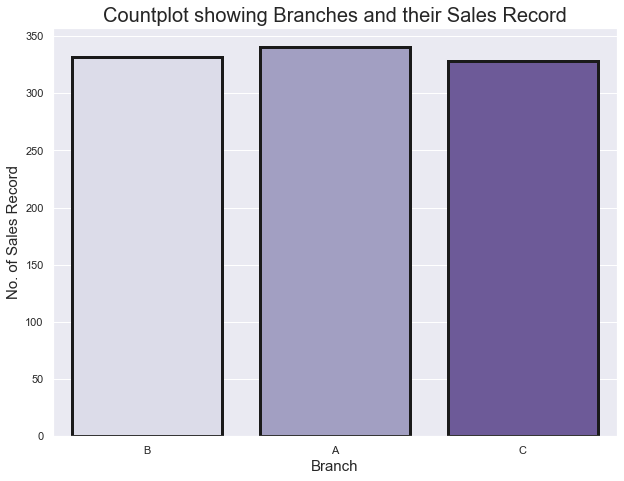

In [42]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(9,7)})

#Creating plot
ax = sns.countplot(x="Branch", data=combined_df, palette="Purples", edgecolor="k", linewidth=3)

#Setting title and customizing labels
ax.set_title("Countplot showing Branches and their Sales Record", fontsize=20)

ax.set_xlabel("Branch", fontsize=15)
ax.set_ylabel("No. of Sales Record", fontsize=15)

#Showing plot
plt.show()

## From the countplot above, Branch A has the highest sales record of 340

#### Explore a countplot for the `Payment` and `City` Column

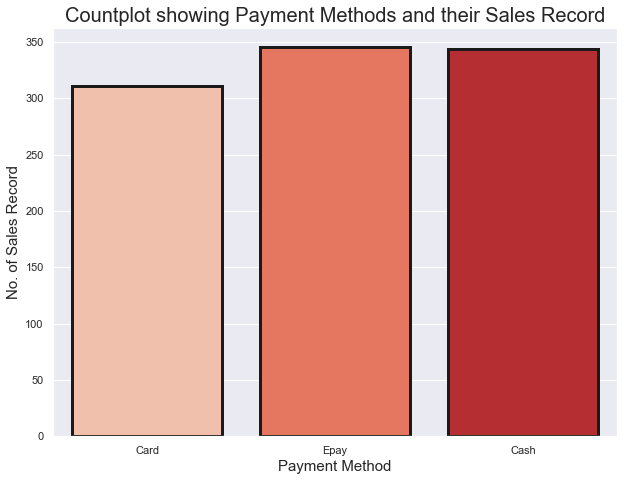

In [43]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(9,7)})

#Creating plot
ax = sns.countplot(x="Payment", data=combined_df, palette="Reds", edgecolor="k", linewidth=3)

#Setting title and customizing labels
ax.set_title("Countplot showing Payment Methods and their Sales Record", fontsize=20)

ax.set_xlabel("Payment Method", fontsize=15)
ax.set_ylabel("No. of Sales Record", fontsize=15)

#Showing plot
plt.show()

## From the countplot above, the most used Payment Method is EPay

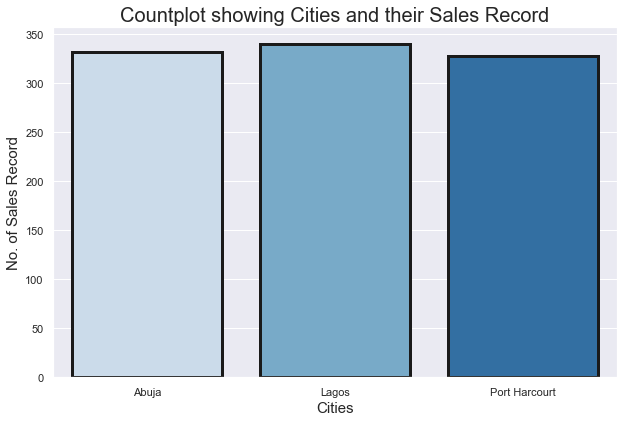

In [44]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(9,6)})

#Creating plot
ax = sns.countplot(x="City", data=combined_df, palette="Blues", edgecolor="k", linewidth=3)

#Setting title and customizing labels
ax.set_title("Countplot showing Cities and their Sales Record", fontsize=20)

ax.set_xlabel("Cities", fontsize=15)
ax.set_ylabel("No. of Sales Record", fontsize=15)

#Showing plot
plt.show()

## From the countplot above, Lagos is the city with highest number of sales ecord with a value of 340

#### To-Do - Determine the highest & lowest sold product line, using Countplot 
Count Plot Tips- Set the `Product line` column to y-axis to prevent congestion on the x-axis

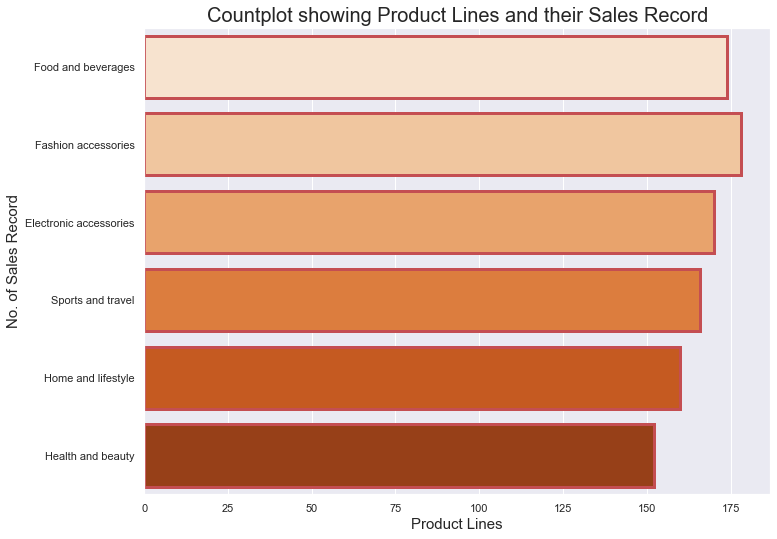

In [45]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10,8)})

#Creating plot
ax = sns.countplot(y="Product line", data=combined_df, palette="Oranges", edgecolor="r", linewidth=3)

#Setting title and customizing labels
ax.set_title("Countplot showing Product Lines and their Sales Record", fontsize=20)

ax.set_xlabel("Product Lines", fontsize=15)
ax.set_ylabel("No. of Sales Record", fontsize=15)

#Showing plot
plt.show()

## From the countplot above, the highest sold product line is Fashion Accessories with sales record of 178 and the lowest sold product line is Health and beauty with sales record of 152

#### To-Do -  Determine the Payment channel used by most customer to pay for each product line. Count Plot Tips- Set the "product line" column to y-axis to prevent congestion on the x-axis, and use the "hue" parameter for the "Payment" column. 

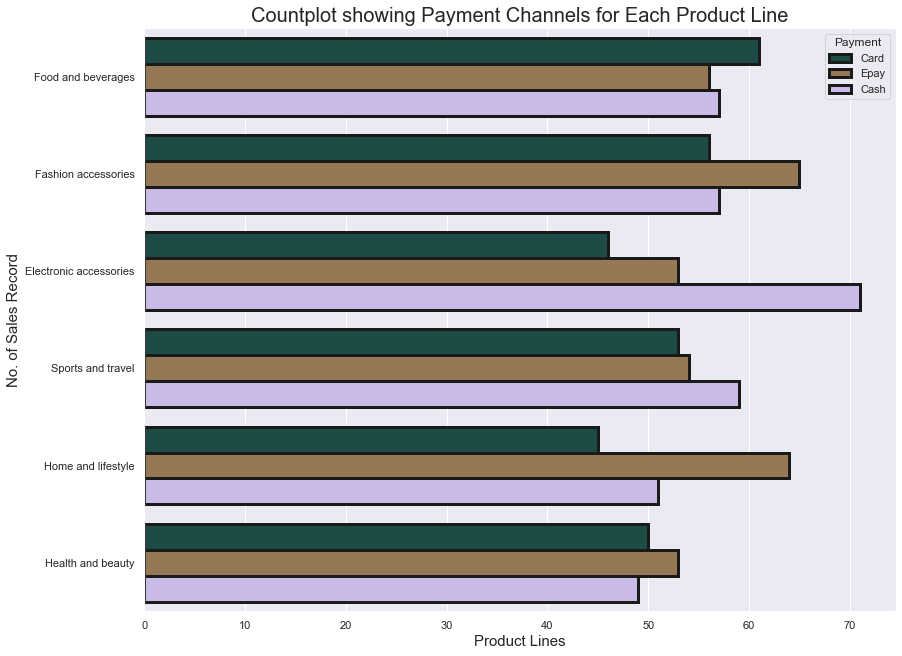

In [46]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,10)})

#Creating plot
ax = sns.countplot(y="Product line", hue="Payment", data=combined_df, palette="cubehelix", edgecolor="k", linewidth=3)

#Setting title and customizing labels
ax.set_title("Countplot showing Payment Channels for Each Product Line", fontsize=20)

ax.set_xlabel("Product Lines", fontsize=15)
ax.set_ylabel("No. of Sales Record", fontsize=15)

#Showing plot
plt.show()

## From the countplot above:
1. The most used Payment Method used in Food and beverages product line : Card
2. The most used Payment Method used in Fashion Accessories product line : Epay
3. The most used Payment Method used in Electronic Accessories product line : Cash
4. The most used Payment Method used in Sports and travel product line : Cash
5. The most used Payment Method used in Home and lifestyle product line : Epay
6. The most used Payment Method used in Health and beauty product line : Epay

#### To-Do- Determine the Payment channel for each branch.
Count Plot Tips - Use the hue parameter for the "branch" column

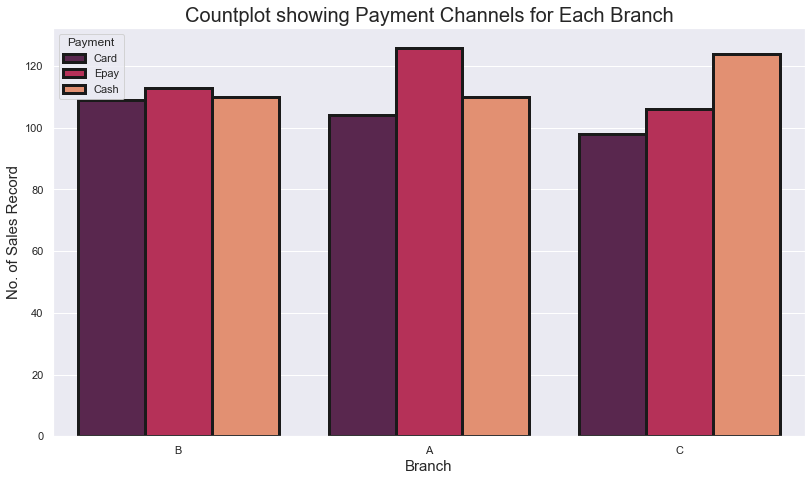

In [47]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,7)})

#Creating plot
ax = sns.countplot(x="Branch", hue="Payment", data=combined_df, palette="rocket", edgecolor="k", linewidth=3)

#Setting title and customizing labels
ax.set_title("Countplot showing Payment Channels for Each Branch", fontsize=20)

ax.set_xlabel("Branch", fontsize=15)
ax.set_ylabel("No. of Sales Record", fontsize=15)

#Showing plot
plt.show()

## From the countplot above:
1. The most used Payment Method used in Branch B: Epay
2. The most used Payment Method used in Branch A: Epay
3. The most used Payment Method used in Branch C: Cash


#### To-Do- Determine the branch with the lowest rating. This you can determine using abox plot which gives a statistical summary of the plotted features, and you can pick out the branch with the lowest rating from the plot

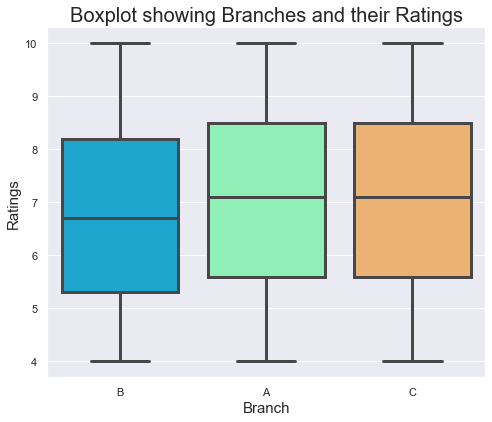

In [48]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(7,6)})

#Creating plot
ax = sns.boxplot(x="Branch", y="Rating", data=combined_df, palette="rainbow", linewidth=3)

#Setting title and customizing labels
ax.set_title("Boxplot showing Branches and their Ratings", fontsize=20)

ax.set_xlabel("Branch", fontsize=15)
ax.set_ylabel("Ratings", fontsize=15)

#Showing plot
plt.show()

## Insight

From the boxplots above, the following observations were made:

1. All the branches have a minimum rating of 4.0 and maximum rating of 10.0.

2. Branch A and Branch C have same ratings of 5.60 falling under the 1st quartile, 7.10 falling under the 2nd quartile and 8.50 falling under the 3rd quartile. 

3. Branch B has ratings of 5.30 for the 1st quartile, 6.70 for the 2nd quartile and 8.20 for the 3rd quartile.

## Therefore, Branch A and B both have the highest ratings while Branch C has the lowest rating.

#### To-Do - The gender type often affects the kind of products being purchased at the supermarket. 
* Using a catplot() generate visualization for the "product line" on x-axis, quantity on the y-axis, and hue as gender. 
<br/>

#### Set the aspect parameter to 4, so can you can effectively space out each product line. 



* Plot the same chart, but `Total Column` as the y-axis

* Write a summary of the insights you can pick from this chart.

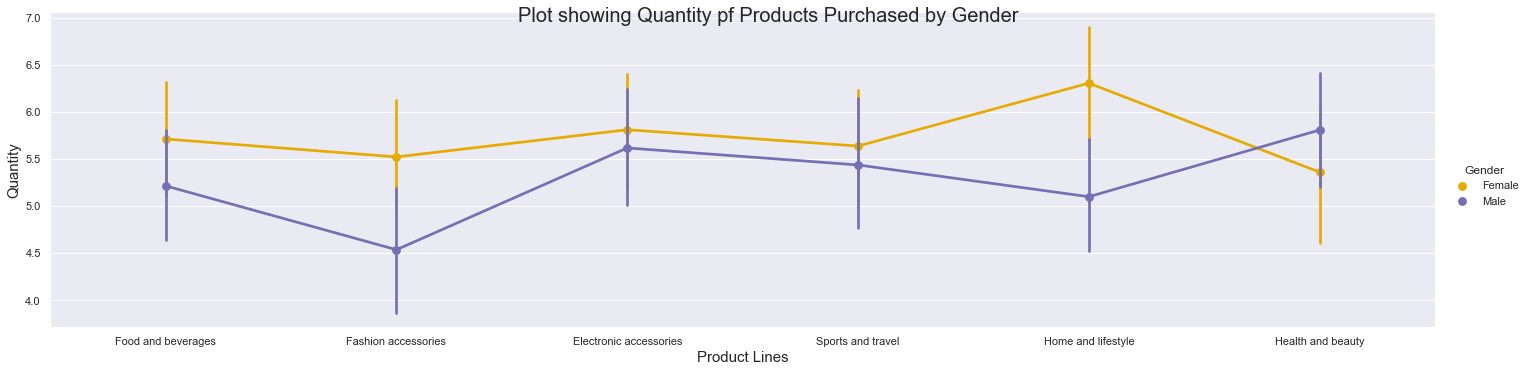

In [49]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,10)})

#Creating plot
ax = sns.catplot(x="Product line", y="Quantity", data=combined_df, hue="Gender", palette="Dark2_r", kind="point", aspect=4, linewidth=3)

#Setting title and customizing labels
ax.fig.suptitle("Plot showing Quantity pf Products Purchased by Gender", fontsize=20)

plt.xlabel("Product Lines", fontsize=15)
plt.ylabel("Quantity", fontsize=15)

#Showing plot
plt.show()

## Insights

From this chart above:

The Female Gender buys more quantities of products from Food and Beverages, Fashion Accessories, Electronic Accessories, Sports and Travel and Home and lifestyle product lines than the Male Gender.

Whereas the Male Gender buys more quantities of products from the Health and Beauty product line than the Female Gender

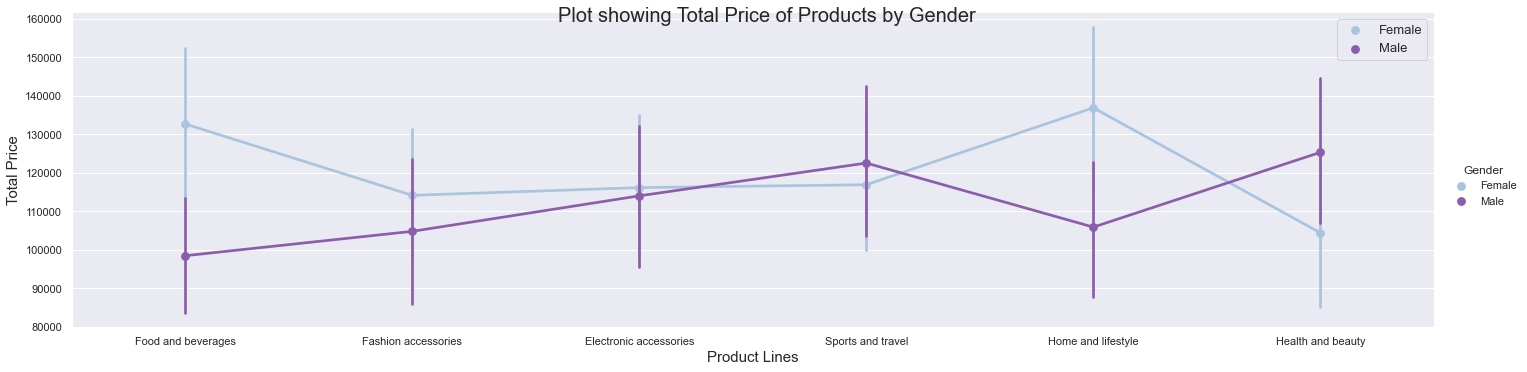

In [50]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,10)})

#Creating plot
ax = sns.catplot(x="Product line", y="Total", data=combined_df, hue="Gender", palette="BuPu", kind="point", aspect=4, linewidth=3)

#Setting title and customizing labels
ax.fig.suptitle("Plot showing Total Price of Products by Gender", fontsize=20)

plt.xlabel("Product Lines", fontsize=15)
plt.ylabel("Total Price", fontsize=15)
plt.legend(fontsize=13)

#Showing plot
plt.show()

## Insights
From this chart above:

The Female Gender has a larger value of total amount spent on products from Food and Beverages, Fashion Accessories, Electronic Accessories and Home and lifestyle product lines compared to that of the Male Gender.

Whereas the Male Gender has a larger value of total amount spent on products from Sports and Travel and Health and Beauty product lines compared to that of the Female Gender

#### To-Do -  An interesting insight to explore is the interaction of Unit price on the Quantity of goods purchased. To achieve this: 
* Use the `catplot()` to plot `Product line per unit price`, and `Product line per Quantity`. Set the kind parameter to `point` 
* In a new cell, Write a summary of the insights you uncovered

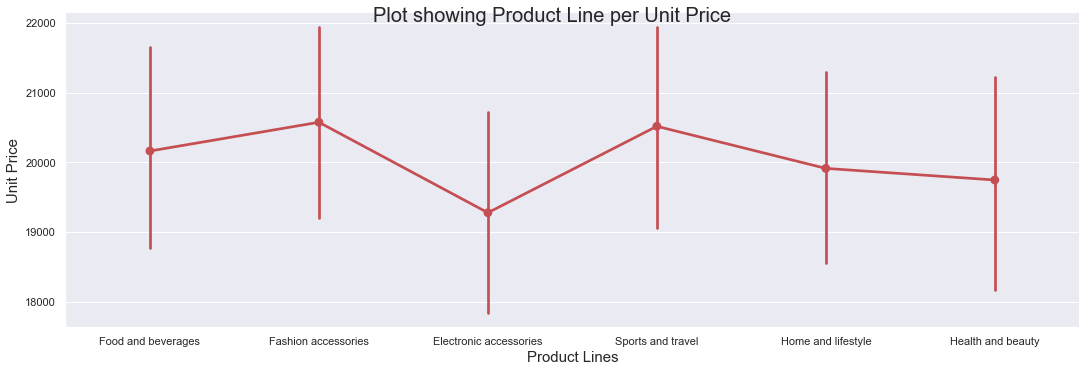

In [51]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,10)})

#Creating plot
ax = sns.catplot(x="Product line", y="Unit price", data=combined_df, color="r", kind="point", aspect=3, linewidth=3)

#Setting title and customizing labels
ax.fig.suptitle("Plot showing Product Line per Unit Price", fontsize=20)

plt.xlabel("Product Lines", fontsize=15)
plt.ylabel("Unit Price", fontsize=15)

#Showing plot
plt.show()

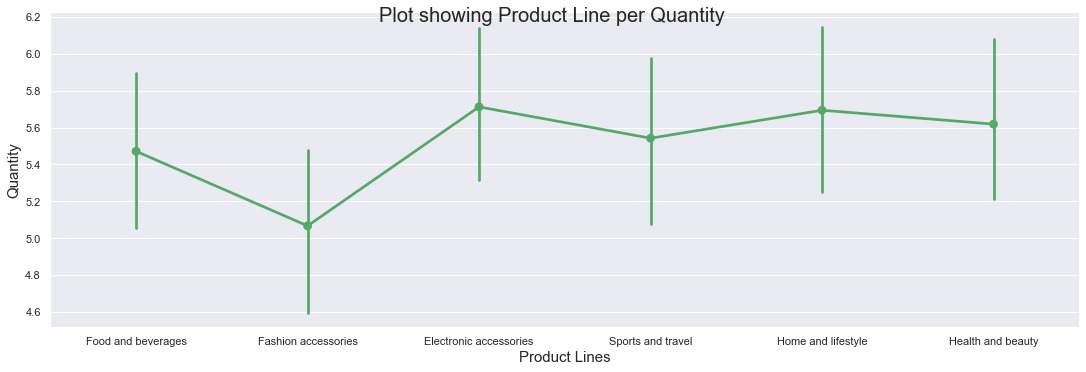

In [52]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(12,10)}) 

#Creating plot
ax = sns.catplot(x="Product line", y="Quantity", data=combined_df, color="g", kind="point", aspect=3, linewidth=3)

#Setting title and customizing labels
ax.fig.suptitle("Plot showing Product Line per Quantity", fontsize=20)

plt.xlabel("Product Lines", fontsize=15)
plt.ylabel("Quantity", fontsize=15)

#Showing plot
plt.show()

## Insights

From the two charts above:
The Electronic Accessories product line has the least average unit price of 19278 and the highest average value of Quantity sold at 5.71. Whereas the Fashion Accessories product line has the highest average unit price of 20575 and the lowest average value of Quantity sold at 5.06.

## This could mean that the lower the unit price, the more quantity sold and the higher the unit price, the lesser the quantity sold

## Step 7 - StandOut Section
To make your submission standout, 
* You can continue to explore more insights that can be uncovered with different plotting methods.
* Write a detailed summary on your approach, methods and insights. 
* Visit the [link](https://seaborn.pydata.org/tutorial/categorical.html) for more Seaborn visualization plots.


## 1. DOES CUSTOMER TYPE AFFECT THE GROSS INCOME OF THE SUPERMARKET

### Approach : Using a bar plot to generate visualization for the "product line" on x-axis then setting hue as "Customer type".

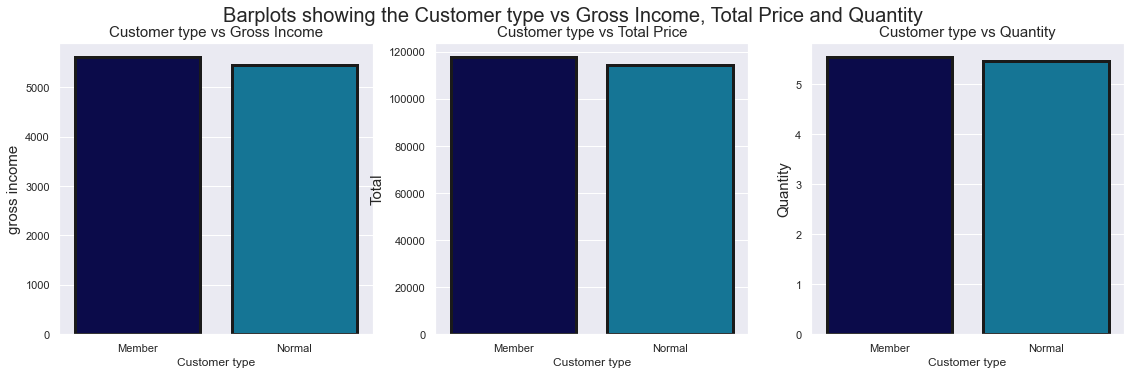

In [53]:
#Setting theme and size
sns.set_theme (style="darkgrid")
sns.set (rc={'figure.figsize':(17,5)})

#Creating plot
fig, axes = plt.subplots(1,3, sharex=True)

sns.barplot (ax=axes[0],x="Customer type", y="gross income", data=combined_df, palette="ocean", edgecolor="k", linewidth=3, ci=None)
sns.barplot(ax=axes[1], x="Customer type",y="Total", data=combined_df, palette="ocean", edgecolor="k", linewidth=3, ci=None)
sns.barplot(ax=axes[2], x="Customer type",y="Quantity", data=combined_df, palette="ocean", edgecolor="k", linewidth=3, ci=None)

#Setting title and customizing labels

fig.suptitle("Barplots showing the Customer type vs Gross Income, Total Price and Quantity", fontsize=20)
axes[0].set_title("Customer type vs Gross Income", fontsize=15)
axes[1].set_title("Customer type vs Total Price", fontsize=15)
axes[2].set_title("Customer type vs Quantity", fontsize=15)

axes[0].set_ylabel("gross income", fontsize=15)
axes[1].set_ylabel("Total", fontsize=15)
axes[2].set_ylabel("Quantity", fontsize=15)

#Showing plot
plt.show()

## Insights

From the barplots above, the following observation was made:

The average total price of goods purchased by the Member customers is higher than that of the Normal customers, also more quantities of products are purchased by Members, therefore leading to a higher gross income for this customer type.

## Therefore, it can be said that Member customers contribute to the resulting increase in the overall gross income.

## 2. DOES THE TIME OF DAY, ESPECIALLY THE HOUR AFFECT THE AMOUNT OF SALES IN EACH BRANCH?


### Approach: Using a line plot to generate visualization for the "Hours" on x-axis and "total", "quantity" and "gross income" on the y-axis

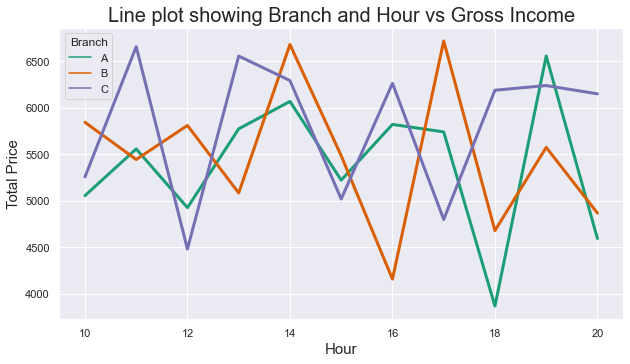

In [54]:
#Setting theme and size
sns.set_theme(style="dark")
sns.set(rc={'figure.figsize':(9,5)})

#Creating plot
ax=sns.lineplot(x="Hour", y="gross income", data=combined_df, hue= "Branch", hue_order=["A", "B", "C"], palette="Dark2", ci=None, linewidth=3)

#Setting title and customizing labels
ax.set_title("Line plot showing Branch and Hour vs Gross Income", fontsize=20)

ax.set_ylabel("Total Price", fontsize=15)
ax.set_xlabel("Hour", fontsize=15)

#Showing plot
plt.show()

## Insights

From the chart above, the following observations were made:

1. Branch A had its highest gross income in the 19th hour (7.00PM) and its lowest gross income at 18th hour (6.00PM).

2. Branch B had its highest gross income in the 14th hour (2.00PM) and 17th hour(5.00PM) and its lowest gross income at 16th hour (4.00PM).

3. Branch C had its highest gross income in the 11th hour (11.00AM) and 13th hour (1.00PM) its lowest gross income at 12th hour (12.00PM).

### Therefore, it can be seen that at the 19th hour (7.00PM), Branch A makes more sales, then, at the 14th hour (2.00PM) and 17th hour (5.00PM), Branch B makes more sales while at the 11th hour(11.00AM), Branch C makes more sales. All these sales led to an increase in the overall gross income of the supermarket.

## Overall, it is observed that Branch C has the highest gross income when compared to other branches

In [55]:
#Using the groupby function to explore the gross income of branches
combined_df.groupby(["Branch"])["gross income"].mean()

Branch
A    5354.640529
B    5483.528675
C    5778.852256
Name: gross income, dtype: float64

## 3.WHAT TIME OF DAY DID THE SUPERMARKET RECORD ITS HIGHEST SALES?

### Approach: Using a line plot to generate visualization for the "Hours" on x-axis and "total", "quantity" and "gross income" on the y-axis

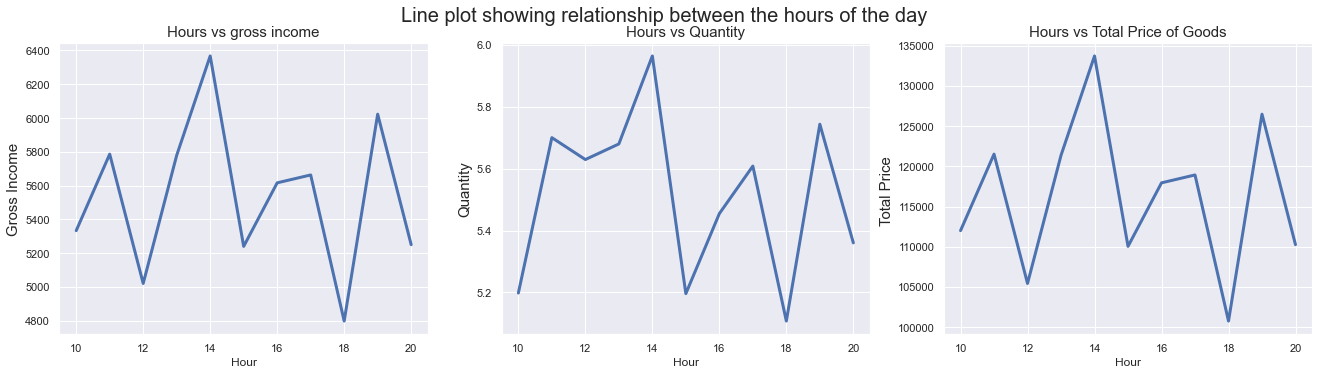

In [56]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,5)})

#Creating plot
fig, axes = plt.subplots(1, 3, sharex=True)
sns.lineplot(ax=axes[0], x="Hour", y="gross income", data=combined_df, palette="rocket", ci=None, linewidth=3)

sns.lineplot(ax=axes[1], x="Hour", y="Quantity", data=combined_df, palette="rocket", ci=None, linewidth=3)

sns.lineplot(ax=axes[2], x="Hour", y="Total", data=combined_df, palette="rocket", ci=None, linewidth=3)

#Setting title and customizing labels
fig.suptitle("Line plot showing relationship between the hours of the day", fontsize=20)
axes[0].set_title("Hours vs gross income", fontsize=15)
axes[1].set_title("Hours vs Quantity", fontsize=15)
axes[2].set_title("Hours vs Total Price of Goods", fontsize=15)

axes[0].set_ylabel("Gross Income", fontsize=15)
axes[1].set_ylabel("Quantity", fontsize=15)
axes[2].set_ylabel("Total Price ", fontsize=15)

#Showing plot
plt.show()

## Insight

From the lineplots above, the following observations were made:

1. The hour of the day with the highest gross income is the 14th hour, that is, 2.00PM while the hour of the day with the lowest gross income is the 18th hour, that is, 6.00PM

2. The hour of the day with the largest quantity of products purchased by a customer is the 14th hour, that is, 2.00PM while the hour of the day with the smallest quantity of products purchased by a customer is the 18th hour, that is, 6.00PM

3. The hour of the day with the maximum total price of goods purchased by a customer is the 14th hour, that is, 2.00PM while the hour of the day with the minimum total price of goods purchased by a customer is the 18th hour, that is, 6.00PM

## Therefore, It is evident from these charts and observations that at the 14th hour(2.00PM), more quantities of products are sold, more purchases are made, therefore leading to a corresponding increase in the overall gross income.

## 3.1.WHAT GENDER AND CUSTOMER TYPE VISITED THE SUPERMARKET DURING THE 14TH HOUR?

### Approach: Using a count plot to generate visualization for the "customer type" on x-axis, then setting hue as "Gender".

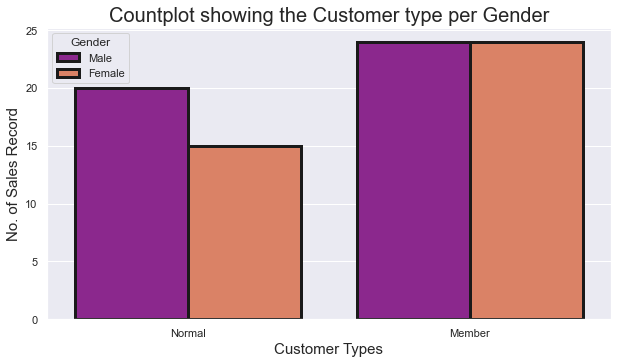

In [57]:
#Subsetting the dataframe for when "Hour"== 14
hour14_df = combined_df[combined_df["Hour"]==14]

#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(9,5)})

#Creating plot
ax = sns.countplot(x="Customer type", data=hour14_df, hue="Gender", palette="plasma", edgecolor="k", linewidth=3)

#Setting title and customizing labels
ax.set_title("Countplot showing the Customer type per Gender", fontsize=20)

ax.set_xlabel("Customer Types", fontsize=15)
ax.set_ylabel("No. of Sales Record", fontsize=15)

#Showing plot
plt.show()

## Insight

From the countplot above, it is obvious that during the 14th hour(2.00PM):

1. More Members patronize the supermarket than Normal customers.

2. The Male Gender patronizes the supermarket more than the Female Gender.

## 3.2.DOES THE GENDER CONTRIBUTE TO HIGH SALES AT THE 14TH HOUR?

### Approach: Using a bar plot to generate visualization for the "Gender" on x-axis and "total" and "gross income" on the y-axis.

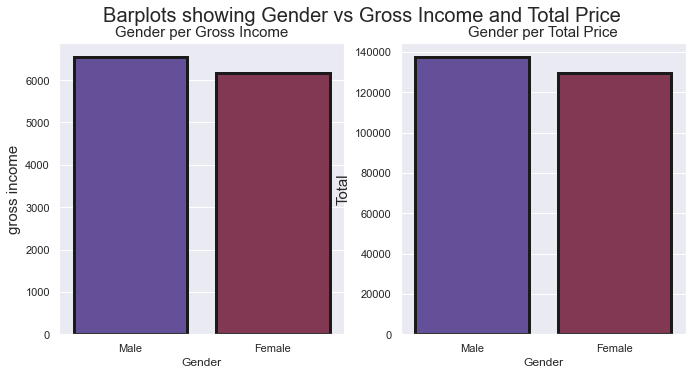

In [58]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(10,5)})

#Creating plot
fig, axes = plt.subplots(1,2, sharex=True)
sns.barplot(ax=axes[0], x="Gender",y="gross income", data=hour14_df, palette="twilight", ci=None, edgecolor="k", linewidth=3)
sns.barplot(ax=axes[1], x="Gender",y="Total", data=hour14_df, palette="twilight", edgecolor="k", ci=None, linewidth=3)

#Setting title and customizing labels
fig.suptitle("Barplots showing Gender vs Gross Income and Total Price", fontsize=20)
axes[0].set_title("Gender per Gross Income", fontsize=15)
axes[1].set_title("Gender per Total Price", fontsize=15)

axes[0].set_ylabel("gross income", fontsize=15)
axes[1].set_ylabel("Total", fontsize=15)

#Showing plot
plt.show()

## Insights

From the barplots above, the following observations were made based on the 14th hour(2.00PM):

1. The average total price of goods purchased by the Male Gender is more than that of the Female Gender.

2. The Male Gender has a higher gross income than that of the Female Gender.

## Therefore, it can be seen that at the 14th hour (2.00PM), the Male Gender spend more on their purchases which results to a higher total price of good purchased which leads to an increase in the gross income of the Male Gender, thereby resulting to a corresponding increase in the overall gross income.

## 4.WHAT MONTH RECORDED THE HIGHEST SALES?

### Approach: Using a bar plot to generate visualization for the "Month" on x-axis with "total", "Quantity" and "gross income" on the y-axis

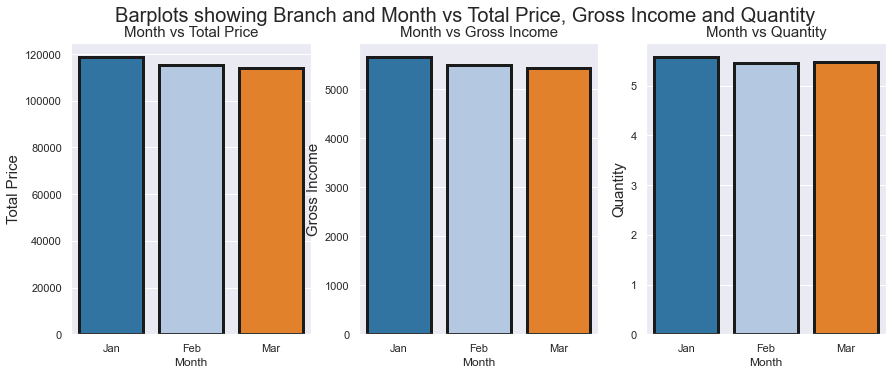

In [59]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(13,5)})

#Creating plots
fig, axes = plt.subplots(1,3)
months=["Jan", "Feb", "Mar"]

sns.barplot(ax=axes[0], x="Month",y="Total", data=combined_df, order=months, palette="tab20", edgecolor="k", linewidth=3, ci=None)
sns.barplot(ax=axes[1], x="Month",y="gross income", data=combined_df, order=months, palette="tab20", edgecolor="k", linewidth=3, ci=None)
sns.barplot(ax=axes[2], x="Month",y="Quantity", data=combined_df, order=months, palette="tab20", edgecolor="k", linewidth=3, ci=None)

#Setting title and customizing labels
fig.suptitle("Barplots showing Branch and Month vs Total Price, Gross Income and Quantity", fontsize=20)
axes[0].set_title("Month vs Total Price", fontsize=15)
axes[1].set_title("Month vs Gross Income", fontsize=15)
axes[2].set_title("Month vs Quantity", fontsize=15)

axes[0].set_ylabel("Total Price", fontsize=15)
axes[1].set_ylabel("Gross Income", fontsize=15)
axes[2].set_ylabel("Quantity", fontsize=15)

#Showing plot
plt.show()

## Insights

From the bar plot above, observations were made:

In the month of January, more quantities of products were purchased, leading to a higher total price in the amount of goods bought, thereby resulting to a much higher gross income when compared to other months.

In the month of March, lesser quantities of products were produced, leading to a lower total price in the amount of goods bought, thereby resulting to the least gross income when compared with other months.

## 4.1.WHAT MONTH DID THE CITIES RECORD THEIR HIGHEST SALES?

### Approach: Using a bar plot to generate visualization for the "City" on x-axis with "total", "Quantity" and "gross income" on the y-axis, then setting hue as "Month".

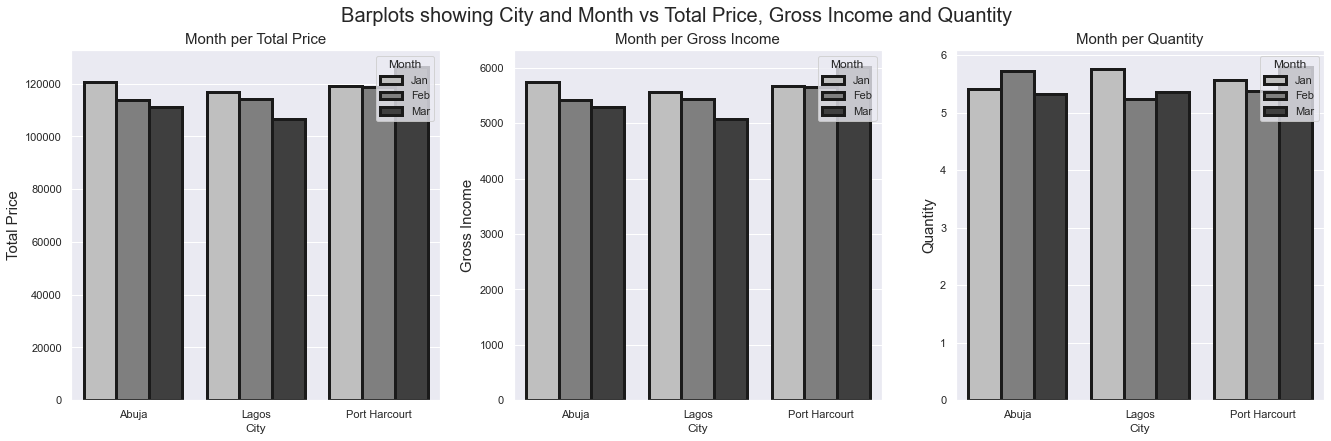

In [60]:
#Setting theme and size
plt.rcParams["font.family"] = "cursive"
sns.set(style="darkgrid", font_scale=1.50)
sns.set(rc={'figure.figsize':(20,6)})

#Creating plot
fig, axes = plt.subplots(1,3)
orderm = ["Jan", "Feb", "Mar"]

sns.barplot(ax=axes[0], x="City",y="Total", data=combined_df, hue="Month", hue_order=orderm, palette="binary", edgecolor="k", linewidth=3, ci=None)
sns.barplot(ax=axes[1], x="City",y="gross income", data=combined_df, hue="Month", hue_order=orderm, palette="binary", edgecolor="k", linewidth=3, ci=None)
sns.barplot(ax=axes[2], x="City",y="Quantity", data=combined_df, hue="Month", hue_order=orderm, palette="binary", edgecolor="k", linewidth=3, ci=None)

#Setting title and customizing labels
fig.suptitle("Barplots showing City and Month vs Total Price, Gross Income and Quantity", fontsize=20)
axes[0].set_title("Month per Total Price", fontsize=15)
axes[1].set_title("Month per Gross Income", fontsize=15)
axes[2].set_title("Month per Quantity", fontsize=15)

axes[0].set_ylabel("Total Price", fontsize=15)
axes[1].set_ylabel("Gross Income", fontsize=15)
axes[2].set_ylabel("Quantity", fontsize=15)


#Showing plot
plt.show()

## Insights
1. In the month of January, Abuja had its highest total price of goods purchased by the customers, leading to Abuja having a higher increase in gross income compared to other months, even though more quantities of products were purchased in other months while in the month of February, Abuja had its least sale record.

2. In the month of January, Lagos had its highest total price of goods purchased by the customers, leading a higher increase in gross income compared to other months, even though more quantities of products are purchased in the other months while in the month of February, Lagos had its least sale record.

3. In the month of March, Port Harcourt had its largest quantities of products purchased and the highest total price of goods purchased by the customers, leading to a higher increase in gross income compared to other months while in the month of January, Port Harcourt had its least sale record.

## 4.2.WHAT PRODUCTS DID THE CUSTOMERS SPEND MORE ON DURING THE PAST MONTHS?

### Approach: Using a bar plot to generate visualization for the "product line" on x-axis and "total" and "gross income" on the y-axis, then setting hue as "Month".

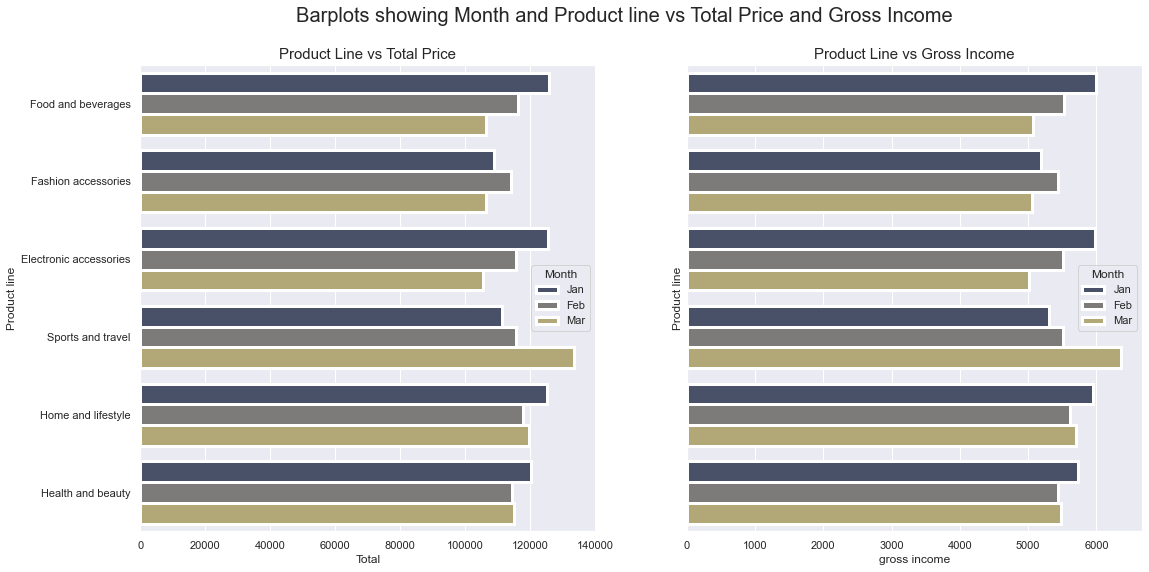

In [61]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})

#Creating plots
fig, axes = plt.subplots(1,2, sharey=True)
orderm = ["Jan", "Feb", "Mar"]

sns.barplot(ax=axes[0], y="Product line", x="Total", data=combined_df, hue="Month", hue_order=orderm, palette="cividis", edgecolor="w", linewidth=3,ci=None)

sns.barplot(ax=axes[1], y="Product line", x="gross income", data=combined_df, hue="Month", hue_order=orderm, palette="cividis", edgecolor="w", linewidth=3, ci=None)

#Setting title and customizing labels
fig.suptitle("Barplots showing Month and Product line vs Total Price and Gross Income", fontsize=20)
axes[0].set_title("Product Line vs Total Price", fontsize=15)
axes[1].set_title("Product Line vs Gross Income", fontsize=15)

#Showing plot
plt.show()

In [62]:
# Using groupby object on product line and month to get the mean of some columns
bm_df = combined_df.groupby(["Product line", "Month"])
bm_df["Total", "Quantity", "gross income"].agg({np.mean})

Total  Quantity gross income
                                       mean      mean         mean
Product line           Month                                      
Electronic accessories Feb    115752.700000  5.796296  5512.033333
                       Jan    125541.920000  6.166667  5978.186667
                       Mar    105348.417097  5.241935  5016.591290
Fashion accessories    Feb    114059.169000  4.916667  5431.389000
                       Jan    108816.277500  5.250000  5181.727500
                       Mar    106339.450000  5.018519  5063.783333
Food and beverages     Feb    116131.110968  5.629032  5530.052903
                       Jan    125810.550000  5.803571  5990.978571
                       Mar    106546.860000  4.964286  5073.660000
Health and beauty      Feb    114278.521304  5.782609  5441.834348
                       Jan    120366.154286  5.183673  5731.721633
                       Mar    114999.868421  5.859649  5476.184211
Home and lifestyle     Feb    117799.422632  5.394737  5609.496316
                       Jan    125052.650847  5.796610  5954.888136
                       Mar    119615.940000  5.777778  5695.997143
Sports and travel      Feb    115615.343721  5.255814  5505.492558
                       Jan    111430.404000  5.357143  5306.209714
                       Mar    133445.839245  6.018868  6354.563774

## Insights

From the above bar charts, the following observaations were made:

1. For the Food and beverages product line, the highest record of total price of goods purchased and increase in gross income occurred in the month of January and its lowest record was in March. In other words, customers spent more on Food and beverages product in the month of January.

2. For the Fashion accesories product line, the highest record of total price of goods purchased and increase in gross income occurred in the month of February and its lowest record was in March. In other words, customers spent more on Fashion accessories product in the month of February.

3. For the Electronic accesories product line, the highest record of total price of goods purchased and increase in gross income occurred in the month of January and its lowest record was in March. In other words, customers spent more on Fashion accessories product in the month of January.

4. For the Sports and travel product line, the highest record of total price of goods purchased and increase in gross income occurred in the month of March and its lowest record was in January. In other words, customers spent more on Fashion accessories product in the month of March.

5. For the Home and lifestyle product line, the highest record of total price of goods purchased and increase in gross income occurred in the month of January and its lowest record was in February. In other words, customers spent more on Fashion accessories product in the month of January.

6. For the Health and beauty product line, the highest record of total price of goods purchased and increase in gross income occurred in the month of January and its lowest record was in February. In other words, customers spent more on Fashion accessories product in the month of February.

## Therefore, this shows that in the month of JANUARY, customers spent more on products from Food and beverages, Electronic accessories, Home and lifestyle and Health and beauty. In the month of FEBRUARY, customers spent more on products from Fashion accessories while in the month of MARCH, customers spent more on products from Sports and travel.

## 4.2.1.WHAT PRODUCTS DID THE CUSTOMERS PURCHASE MORE IN THE BRANCHES DURING THE MONTHS?

### Approach: Using a line plot to generate visualization for the "product line" on x-axis and "total", "quantity" and "gross income" on the y-axis, then setting hue as "Month".

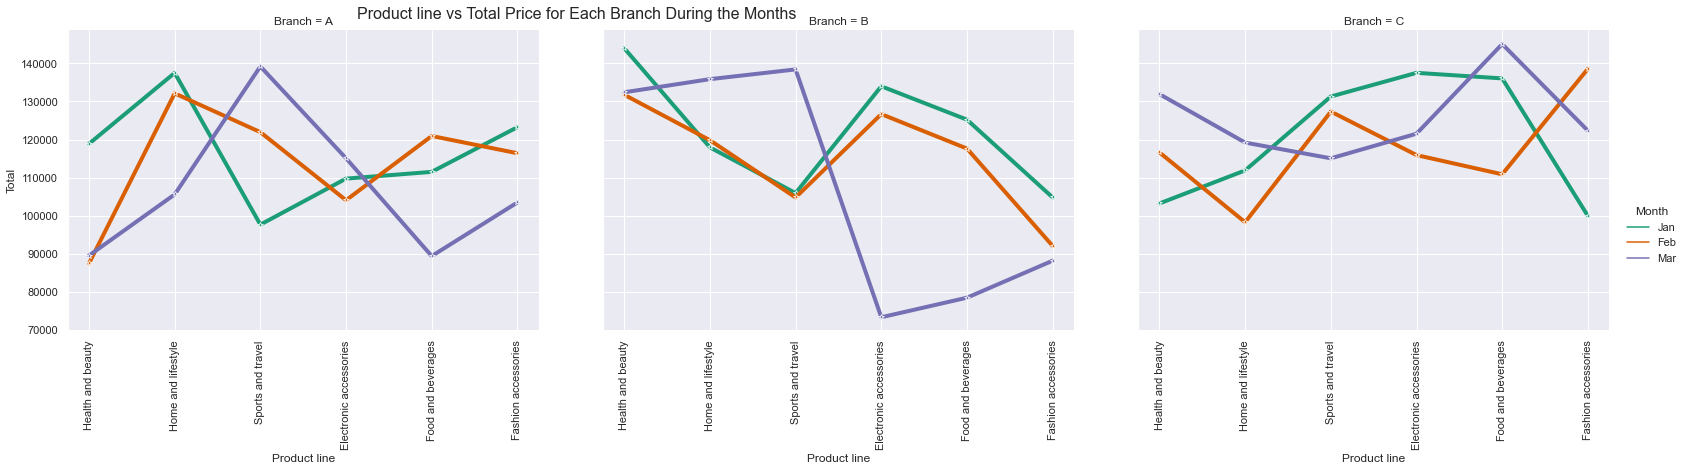

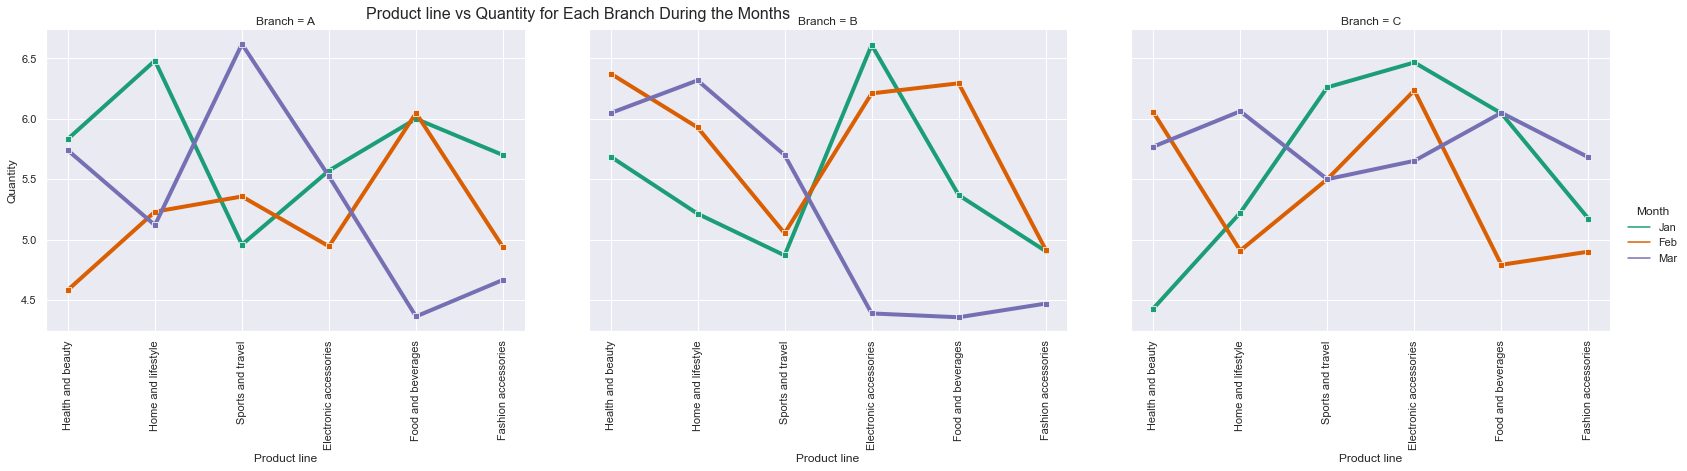

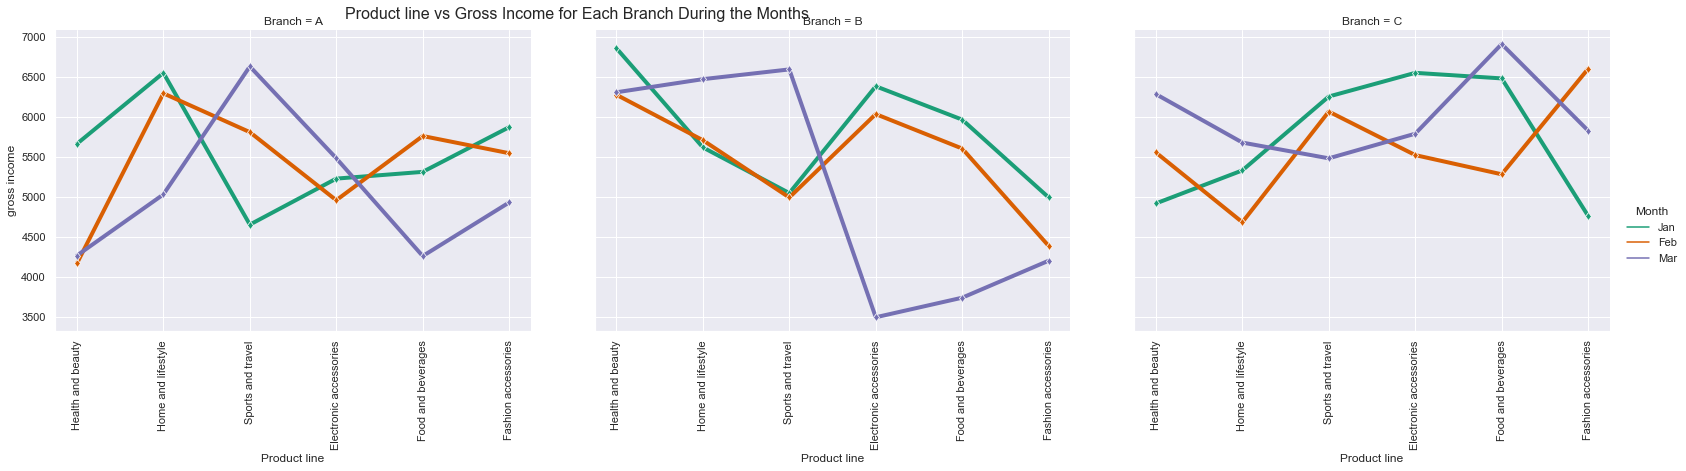

In [63]:
# Setting style
sns.set(style="darkgrid")

# Creating plot
ax1 = sns.relplot(x="Product line", y="Total", data=combined_df, hue="Month", hue_order=["Jan", "Feb", "Mar"], col="Branch",col_order=["A", "B", "C"], col_wrap=3, palette="Dark2", kind="line", ci=None, height=5, aspect=1.5, linewidth=4, marker="*")

ax2 = sns.relplot(x="Product line", y="Quantity", data=combined_df, hue="Month", hue_order=["Jan", "Feb", "Mar"], col="Branch",col_order=["A", "B", "C"], col_wrap=3, palette="Dark2", kind="line", ci=None, height=5, aspect=1.5, linewidth=4, marker="s")

ax3 = sns.relplot(x="Product line", y="gross income", data=combined_df, hue="Month", hue_order=["Jan", "Feb", "Mar"], col="Branch",col_order=["A", "B", "C"], col_wrap=3, palette="Dark2", kind="line", ci=None, height=5, aspect=1.5, linewidth=4, marker="d")

# Setting labels and title
ax1.fig.suptitle("Product line vs Total Price for Each Branch During the Months",x=0.34, y=0.99, fontsize=16)
ax2.fig.suptitle("Product line vs Quantity for Each Branch During the Months", x=0.34, y=0.99, fontsize=16)
ax3.fig.suptitle("Product line vs Gross Income for Each Branch During the Months", x=0.34, y=0.99, fontsize=16)

labels = ["Health and beauty", "Home and lifestyle", "Sports and travel", "Electronic accessories", "Food and beverages", "Fashion accessories"]
ax1.set_xticklabels(labels, rotation=90)
ax2.set_xticklabels(labels, rotation=90)
ax3.set_xticklabels(labels, rotation=90)

#Showing plot
plt.show()

## Insights

From the charts above, some observations were made.

For Branch A:

1. In the month of January, more quantities of products from the Home and Lifestyle line were purchased and the total price of goods purchased by the customers was higher than other product lines, leading to a higher gross income for the Home and Lifestyle product line while the product line with the least quantities purchased is Sports and travel leaving it with the lowest gross income compared to other product lines.

2. In the month of February, more quantities of products from the Food and Beverages line were purchased but the Home and Lifestyle line has the largest total price of goods purchased by the customers, leading to a higher gross income for the product line while the Health and beauty product line has the least quantities of products purchased, leaving it with the lowest gross income compared to other product lines.

3. In the month of March, more quantities of products from the Sports and travel line were purchased and the total price of goods purchased by the customers was higher than other product lines, leading to a higher gross income for the Sports and travel line while the product line with the least quantities purchased is Food and beverages leaving it with the lowest gross income compared to other product lines.

### It should be noted that in the month of February, all the product lines except Food and beverages and Sports and travel lines experienced a decrease in the quantities of goods purchased and also in their gross income compared to the previous month(January). Then in the month of March, all the product lines except the Electronic accessories, Health and beauty and Sports and travel product lines experienced a further decrease in the quantities of goods purchased and also in their gross income compared to the previous month(February).

### Also Branch A recorded its highest sales in the month of January, with more quantities of products sold and a higher gross income.

For Branch B:

1. In the month of January, more quantities of products from the Electronic accessories line were purchased but the Home and Lifestyle line has the largest total price of goods purchased by the customers, leading to a higher gross income for the Home and Lifestyle product line while the product line with the least total price of goods purchased by a customer is Fashion accessories leaving it with the lowest gross income compared to other product lines.

2. In the month of February, more quantities of products from the Health and beauty line and the total price of goods purchased by the customers was higher than other product lines, leading to a higher gross income for the product line while the Fashion accessories product line has the least quantities of products purchased, leaving it with the lowest gross income compared to other product lines.

3. In the month of March, more quantities of products from the Sports and travel, Home and lifestyle and Health and beauty lines were purchased and the total price of goods purchased by the customers in the above mentioned product lines were higher than other product lines, leading to a higher gross income for these lines while the Electronic accessories, Food and beverages and Fashion accessories product lines have the least quantities of goods purchased, leaving them with the lowest gross income compared to other product lines.

### It should be noted that in the month of February, all the product lines except Home and lifestyle experienced a decrease in the quantities of goods purchased and also in their gross income compared to the previous month(January). Then in the month of March, all the product linces except the Sports and travel, Home and lifestyle and Health and beauty lines experienced a further decrease in the quantities of goods purchased and also in their gross income compared to the previous month(February).

### Also Branch B recorded its highest sales in the month of January, with more quantities of products sold and a higher gross income.

For Branch C:

In the month of January, more quantities of products from the Electronic accessories, Food and Beverages, Sports and travel lines were purchased and the total price of goods purchased by the customers in the above mentioned product lines were higher than other product lines, leading to a higher gross income for these lines while the Fashion accessories, Health and beauty, Home and lifestyle product lines have the least quantities of goods purchased, leaving them with the lowest gross income compared to other product lines.

In the month of February, more quantities of products from the Electronic accessories and Health and beauty lines were purchased but the Fashion accessories and Sports and travel lines have the largest total price of goods purchased by the customers, leading to a higher gross income for the Fashion accessories and Sports and travel product lines while the Home and lifestyle product line has the least quantities of products purchased, leaving it with the lowest gross income compared to other product lines.

In the month of March, more quantities of products from the Food and Beverages and Home and lifestyle lines were purchased but the Food and Beverages and Health and beauty lines have the largest total price of goods purchased by the customers, leading to a higher gross income for the Food and beverages and Health and beauty product lines while the Sports and travel product line has the least quantities of products purchased, leaving it with the lowest gross income compared to other product lines.

### It should be noted that in the month of February, all the product lines except Fashion accessories and Health and beauty experienced a decrease in the quantities of goods purchased and also in their gross income compared to the previous month(January). Then in the month of March, all the product linces except the Fashion accessories and Sports and travel lines experienced an increase in the quantities of goods purchased and also in their gross income compared to the previous month(February).

### Also Branch C recorded its highest sales in the month of March, with more quantities of products sold and a higher gross income.

In [64]:
#Using groupby object to explore the mean of some columns based on branch and month
bm_df = combined_df.groupby(["Branch", "Month"])
bm_df["Total", "Quantity", "gross income"].agg({np.mean})

Total  Quantity gross income
                       mean      mean         mean
Branch Month                                      
A      Feb    114357.908298  5.244681  5445.614681
       Jan    117018.540000  5.756303  5572.311429
       Mar    106750.265669  5.362205  5083.345984
B      Feb    113694.840000  5.724771  5414.040000
       Jan    120571.000541  5.405405  5741.476216
       Mar    111205.743750  5.321429  5295.511607
C      Feb    118565.937000  5.370000  5645.997000
       Jan    119315.452131  5.573770  5681.688197
       Mar    126336.372453  5.792453  6016.017736

## 5.DOES GENDER AND CUSTOMER TYPE AFFECT RATINGS?

### Approach: Using a boxplot to generate statistical summary of "ratings" based on "Gender" and "Customer type"

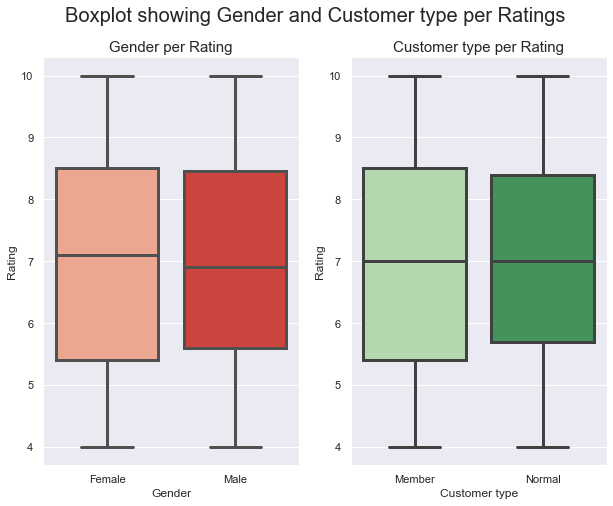

In [65]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(9,7)})

#Creating plots
fig, axes = plt.subplots(1,2)

sns.boxplot(ax=axes[0], x="Gender", y="Rating", data=combined_df, palette="Reds", linewidth=3)
sns.boxplot(ax=axes[1], x="Customer type", y="Rating", data=combined_df, palette="Greens", linewidth=3)

#Setting title and customizing labels
fig.suptitle("Boxplot showing Gender and Customer type per Ratings", fontsize=20)
axes[0].set_title("Gender per Rating", fontsize=15)
axes[1].set_title("Customer type per Rating", fontsize=15)

ax.set_ylabel("Ratings", fontsize=15)

#Showing plot
plt.show()

## Insights

    From the Gender boxplot above, the following observations were made:

1. Both gender have a minimum rating of 4.0 and maximum rating of 10.0.

2. The Male gender gave ratings of 5.60 falling under the 1st quartile, 6.90 falling under the 2nd quartile and 8.45 falling under the 3rd quartile.

3. Normal customers gave ratings of 5.40 for the 1st quartile, 7.10 for the 2nd quartile and 8.50 for the 3rd quartile.

### Actually the genders gave high ratings but the Male gender gave much higher ratings.



    From the Customer type boxplot above, the following observations were made:

1. Both customer types have a minimum rating of 4.0 and maximum rating of 10.0.

2. Member customers gave ratings of 5.40 falling under the 1st quartile, 7.00 falling under the 2nd quartile and 8.50 falling under the 3rd quartile. 

3. Normal customers gave ratings of 5.70 for the 1st quartile, 7.00 for the 2nd quartile and 8.40 for the 3rd quartile.

### Actually the two customer types gave high ratings but the Normal customers gave much higher ratings.

## 6.WHAT PRODUCT LINE HAS THE LEAST RATINGS?

### Approach: Using a boxplot to generate statistical summary of "ratings" based on "Product line"

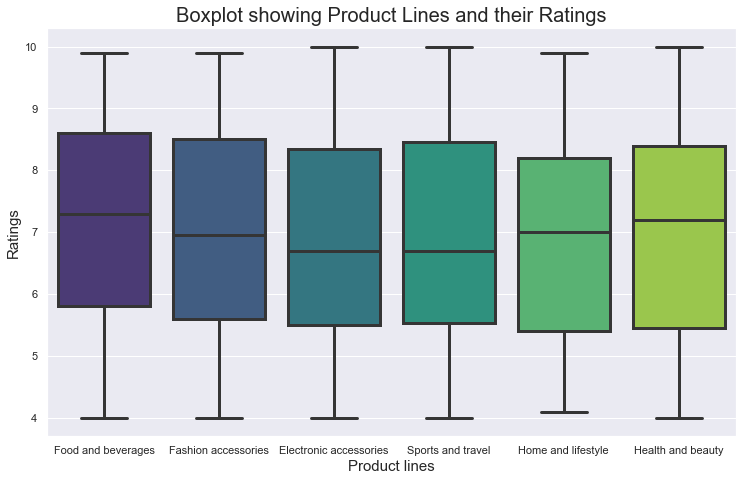

In [66]:
#Setting theme and size
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11,7)})

#Creating plot
ax = sns.boxplot(x="Product line", y="Rating", data=combined_df, palette="viridis", linewidth=3)

#Setting title and customizing labels
ax.set_title("Boxplot showing Product Lines and their Ratings", fontsize=20)

ax.set_xlabel("Product lines", fontsize=15)
ax.set_ylabel("Ratings", fontsize=15)

#Showing plot
plt.show()

## Insight

From the boxplots above, the following observations were made:

Electronic accessories, Sports and travel and Health and beauty product lines have a minimum rating of 4.0 and maximum rating of 10.0, while products from Food and beverages and Fashion accessories product lines have a minimum rating of 4.0 and maximum rating of 9.90 and then the Home and lifestyle product line with a minimum rating of 4.10 and maximum rating of 9.90.


## Therefore, Electronic accessories, Sports and travel and Health and beauty product lines received much higher ratings than products from the Food and beverages, Fashion accessories and Home and lifestyle product lines. 

## Step 8 - Documentation.

* Write a detailed `ReadMe` that describes the project, explains important approach you followed to solve the tasks. Find a template in the starter file that can get you started quickly. Note: Do limit yourself to the template, you can include any interesting step that is worth sharing. 
* Write an Executive summary that you can present to `Company XYZ` management. The summary will explain your processes and insights you uncovered that can help the company 